## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

An attempt to write a for loop to process files given a list|Dict of names

### Import the datasets

These are the _9_ `CSV` datasets

In [3]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')

These are the _2_ `TSV` datasets

In [4]:
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', 
                                 header=0, sep='\t', encoding='ISO-8859-1', quotechar='"')
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', 
                                 header=0, sep='\t', encoding='ISO-8859-1', quotechar='"')

## EDA on `bom_movie_gross`

In [5]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Info 
#### Missing Values
* ~ 1300 missing in Foreign Gross and convert to float
* ~ 30 in domestic gross (already float)
* Studio is missing 5 values, may not be important

In [6]:
bom_movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Set index to _movie title_

In [7]:
bom_movie_gross.set_index(['title'], inplace=True)

__Domestic Gross__ 
_Top 5_

Divide column by 1 million to makes totals easier to evaluate

In [8]:
bom_movie_gross['domestic_gross_mm'] = bom_movie_gross['domestic_gross'] / 1000000

In [9]:
bom_movie_gross.sort_values(by='domestic_gross_mm', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7
Black Panther,BV,700100000.0,646900000,2018,700.1
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3
Marvel's The Avengers,BV,623400000.0,895500000,2012,623.4


If over 1 billion, total is annotated as such `"1,131.6"` see foreign gross for Star Wars from [Box Office Mojo](https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_se_r_8).

__Foreign Gross__

_Cannot sort because dtype is object_

Additionally, scale needs to be adjusted, to the same way `domestic_gross` is annotated, so that data can be analyzed on the same scale. 

In [10]:
bom_movie_gross.sort_values(by='foreign_gross', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Life's a Breeze,Magn.,3500.0,99700,2014,0.0035
The East,FoxS,2300000.0,99700,2013,2.3000
White Lion,Scre.,NaN,99600,2010,NaN
A United Kingdom,FoxS,3900000.0,9900000,2017,3.9000
Le Havre,Jan.,612000.0,9900000,2011,0.6120


_These are the 5 films that had foreign gross > 1 billion_

In [84]:
# filter foreign gross over 1 billion
bill_filt = bom_movie_gross['foreign_gross'].str.contains(',', na=False)
bom_movie_gross[bill_filt]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross
title,,,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7,1131.6,2068.3
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3,1019.4,1671.7
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0,1163.0,1516.0
The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017,226.0,1010.0,1236.0
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8,1369.5,2048.3


In [12]:
bom_movie_gross['foreign_gross'].apply(type).value_counts()

<class 'str'>      2037
<class 'float'>    1350
Name: foreign_gross, dtype: int64

#### Create Python Script
* Checks if value is a string 
* If True, check for comma. 
* If True remove comma and convert to float. 
* If False, return float and divide by 1 million 
* Otherwise the value is numeric.

Once column is converted to floats all in the same decimal level, then they can be divided by 1 million to get correct scalling of foreign_gross. 

This function could be called clean_convert_gross.

In [13]:
from clean_data import clean_convert_gross

In [14]:
bom_movie_gross['foreign_gross_mm'] = bom_movie_gross['foreign_gross'].apply(clean_convert_gross)

In [16]:
bom_movie_gross.head()

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm
title,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0
Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3
Inception,WB,292600000.0,535700000,2010,292.6,535.7
Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9


Sort by new column `foreign_gross_mm` to get top 5 foreign gross.

In [17]:
bom_movie_gross.sort_values(by='foreign_gross_mm', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm
title,,,,,,
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8,1369.5
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0,1163.0
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7,1131.6
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3,1019.4
The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017,226.0,1010.0


Create a `total_gross` column

In [19]:
bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross_mm'] + bom_movie_gross['foreign_gross_mm']

In [23]:
bom_movie_gross.sort_values(by='total_gross', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross
title,,,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7,1131.6,2068.3
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8,1369.5,2048.3
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3,1019.4,1671.7
Marvel's The Avengers,BV,623400000.0,895500000,2012,623.4,895.5,1518.9
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0,1163.0,1516.0


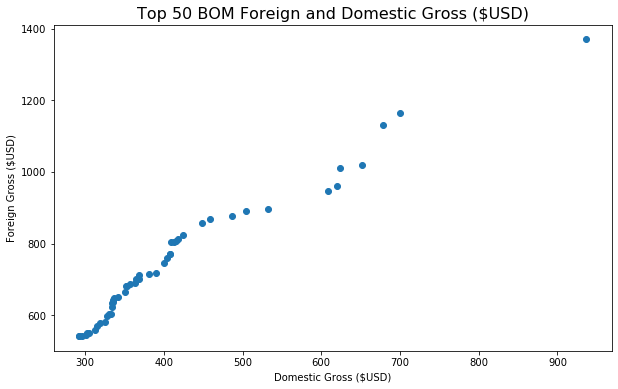

In [59]:
# plot a basic graph showing top 50 total grossing movies
x = bom_movie_gross['domestic_gross_mm'].sort_values(ascending=False)[:50]
y = bom_movie_gross['foreign_gross_mm'].sort_values(ascending=False)[:50]

plt.figure(figsize=(10,6))

plt.scatter(x, y)
plt.xlabel('Domestic Gross ($USD)')
plt.ylabel('Foreign Gross ($USD)')
plt.title('Top 50 BOM Foreign and Domestic Gross ($USD)', fontsize=16)
plt.show();

## EDA on `imdb_title_ratings`

In [51]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Check for null values

In [52]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Get descriptive stats

In [55]:
imdb_title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Get top 5 `averagerating` > mean of 3524 `numvotes`

In [75]:
# create a filter for above mean of numvotes
num_vote_filt  = imdb_title_ratings['numvotes'] > imdb_title_ratings['numvotes'].mean()

In [79]:
imdb_title_ratings[num_vote_filt].sort_values(by='averagerating', ascending=False)[:5]

,tconst,averagerating,numvotes
63149,tt7131622,9.7,5600
12174,tt5963218,9.5,6509
4461,tt7738784,9.4,9629
49629,tt2170667,9.3,17308
10198,tt5354160,9.3,18470


Get top 5 `numvotes` > mean of 6.3 `averagerating`

In [80]:
# create a filter for above mean of averagerating
average_rating_filt = imdb_title_ratings['averagerating'] > imdb_title_ratings['averagerating'].mean()

In [81]:
imdb_title_ratings[average_rating_filt].sort_values(by='numvotes', ascending=False)[:5]

,tconst,averagerating,numvotes
63498,tt1375666,8.8,1841066
8738,tt1345836,8.4,1387769
24920,tt0816692,8.6,1299334
38058,tt1853728,8.4,1211405
48221,tt0848228,8.1,1183655


What is the relationship between mean Top 50 `averagerating` and `numvotes`?

TypeError: unhashable type: 'numpy.ndarray'

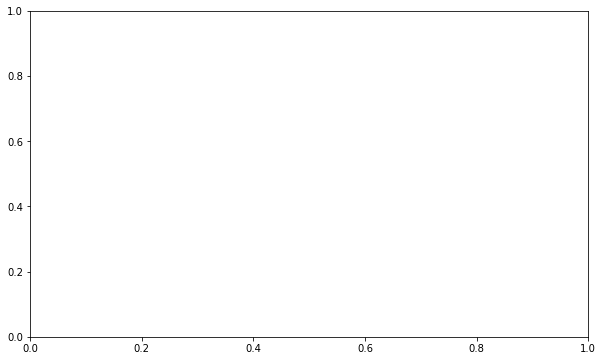

In [83]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(imdb_title_ratings[num_vote_filt].sort_values(by='numvotes', ascending=False)[:50], 
           imdb_title_ratings[average_rating_filt].sort_values(by='averagerating', ascending=False)[:50])

ax.set_title('IMDB Top 50 Average Rating vs. Number of Votes')
ax.set_xlabel('Number of Votes')
ax.set_ylabel('Average Rating')
